<a href="https://colab.research.google.com/github/wsj20010128/ML_Notes/blob/main/Linear-Regression/02-Regression-Metrics-MSE-vs-MAE/02-Regression-Metrics-MSE-vs-MAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criteria for Measuring Regression Algorithms

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Boston Housing Dataset

In [3]:
boston = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
# only use the feature RM
x = boston.data[:, 5]

In [7]:
x.shape

(506,)

In [8]:
y = boston.target

In [9]:
y.shape

(506,)

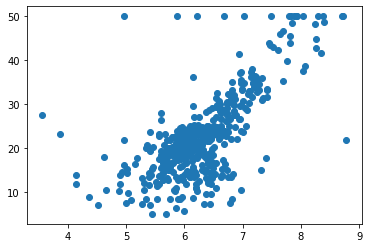

In [10]:
plt.scatter(x, y)
plt.show()

In [11]:
x = x[y < 50.0]
y = y[y < 50.0]

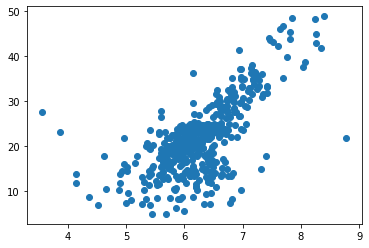

In [12]:
plt.scatter(x, y)
plt.show()

## Use Simple Linear Regression

In [13]:
from model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [14]:
x_train.shape

(392,)

In [15]:
x_test.shape

(98,)

In [16]:
from SimpleLinearRegression import SimpleLinearRegression

In [19]:
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)

SimpleLinearRegression()

In [20]:
reg.a_

7.8608543562689555

In [21]:
reg.b_

-27.459342806705543

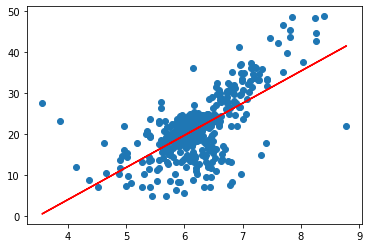

In [22]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [23]:
y_predict = reg.predict(x_test)

## MSE

In [24]:
mse_test = np.sum((y_test - y_predict) ** 2) / len(y_test)
mse_test

24.156602134387438

## RMSE

In [26]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

## MAE

In [31]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae_test

3.5430974409463873

In [32]:
from playML.metrics import mean_squared_error
from playML.metrics import root_mean_squared_error
from playML.metrics import mean_absolute_error

In [33]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [37]:
root_mean_squared_error(y_test, y_predict)

4.914936635846635

In [35]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

## MSE and MAE in scikit-learn

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [38]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [39]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873